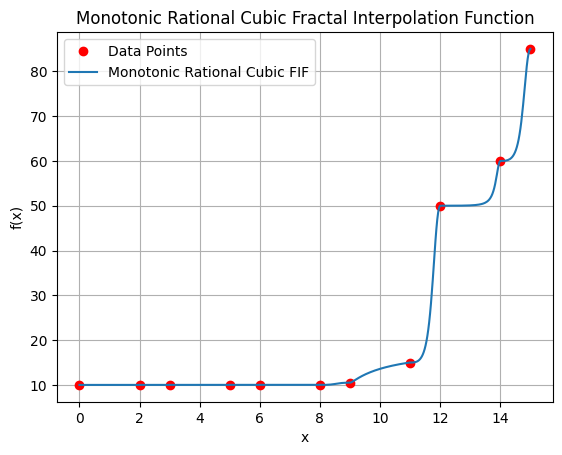

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the example
data_points = [(0, 10), (2, 10), (3, 10), (5, 10), (6, 10), (8, 10), (9, 10.5),
               (11, 15), (12, 50), (14, 60), (15, 85)]  # List of tuples (x, f(x))
x_vals, f_vals = zip(*data_points)  # Separate x and f(x) values

# Define scaling factors and shape parameters (given in Section 5.1)
scaling_factors = [0, 0, 0, 0, 0, 0.0023, 0.06, 0.0526, 0.0772, 0.0667]  # List of scaling factors α_i
shape_params_vi = [0, 0, 0, 0, 0, 1, 28.8880, 7.7532, 118.3432, 9.1608]  # Shape parameters v_i
shape_params_wi = [0, 0, 0, 0, 0, 0.5010, 65.1109, 0.004, 0.0431, 0.0079]  # Shape parameters w_i

# Rational cubic FIF function with monotonicity constraints
def rational_cubic_monotonic_fif(x_interp, x_vals, f_vals, scaling_factors, vi, wi):
    y_interp = []  # Interpolated values of f(x) at x_interp


    for x in x_interp:

        for i in range(len(x_vals) - 1):
            if x_vals[i] <= x <= x_vals[i + 1]:
                # Identify endpoints and function values at the interval
                xi, fi = x_vals[i], f_vals[i]
                xi_next, fi_next = x_vals[i + 1], f_vals[i + 1]
                hi = xi_next - xi  # Interval width
                alpha_i = scaling_factors[i]  # Scaling factor α_i for the interval

                # Compute the interpolation parameter θ for the interval
                theta = (x - xi) / hi

                # Calculate P_i (numerator of FIF function) using the rational cubic formula
                Pi = (fi * (1 - theta)**3 +
                      (vi[i] * fi + hi * alpha_i * (f_vals[i] - fi)) * theta * (1 - theta)**2 +
                      (wi[i] * fi_next - hi * alpha_i * (f_vals[i + 1] - fi)) * theta**2 * (1 - theta) +
                      fi_next * theta**3)

                # Calculate Q_i (denominator of FIF function) to ensure rational form
                Qi = (1 - theta)**3 + vi[i] * theta * (1 - theta)**2 + wi[i] * theta**2 * (1 - theta) + theta**3

                # Append the computed FIF value for the current x
                y_interp.append(Pi / Qi)
                break

    return np.array(y_interp)  # Return interpolated values as a numpy array

# Generate interpolated points
x_interp = np.linspace(min(x_vals), max(x_vals), 500)  # x values for interpolation
y_interp = rational_cubic_monotonic_fif(x_interp, x_vals, f_vals, scaling_factors, shape_params_vi, shape_params_wi)

# Plotting
plt.plot(x_vals, f_vals, 'ro', label="Data Points")  # Plot original data points
plt.plot(x_interp, y_interp, label="Monotonic Rational Cubic FIF")  # Plot interpolated curve
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Monotonic Rational Cubic Fractal Interpolation Function")
plt.legend()  # Display legend
plt.grid(True)  # Add grid for readability
plt.show()  # Display the plot


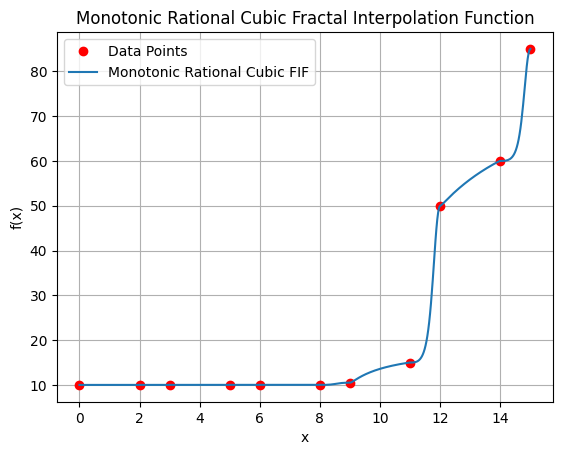

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  data from the example
data_points = [(0, 10), (2, 10), (3, 10), (5, 10), (6, 10), (8, 10), (9, 10.5),
               (11, 15), (12, 50), (14, 60), (15, 85)]
x_vals, f_vals = zip(*data_points)

# Define scaling factors and shape parameters (given in Section 5.1)
scaling_factors = [0, 0, 0, 0, 0, 0.0021, 0.05,  0.0525, 0.001, 0.0665]
shape_params_vi = [0, 0, 0, 0, 0, 1, 28.8880, 7.7532,  50.3778, 9.1608]
shape_params_wi = [0, 0, 0, 0, 0, 0.5010,  65.1109, 0.004,  72.929, 0.0079]

# Rational cubic FIF function with monotonicity constraints
def rational_cubic_monotonic_fif(x_interp, x_vals, f_vals, scaling_factors, vi, wi):
    y_interp = []

    for x in x_interp:
        # Find the interval where x is located
        for i in range(len(x_vals) - 1):
            if x_vals[i] <= x <= x_vals[i + 1]:
                xi, fi = x_vals[i], f_vals[i]
                xi_next, fi_next = x_vals[i + 1], f_vals[i + 1]
                hi = xi_next - xi
                alpha_i = scaling_factors[i]

                # Compute theta for the interval
                theta = (x - xi) / hi
                Pi = (fi * (1 - theta)**3 +
                      (vi[i] * fi + hi * alpha_i * (f_vals[i] - fi)) * theta * (1 - theta)**2 +
                      (wi[i] * fi_next - hi * alpha_i * (f_vals[i + 1] - fi)) * theta**2 * (1 - theta) +
                      fi_next * theta**3)
                Qi = (1 - theta)**3 + vi[i] * theta * (1 - theta)**2 + wi[i] * theta**2 * (1 - theta) + theta**3

                y_interp.append(Pi / Qi)
                break

    return np.array(y_interp)

# Generate interpolated points
x_interp = np.linspace(min(x_vals), max(x_vals), 500)
y_interp = rational_cubic_monotonic_fif(x_interp, x_vals, f_vals, scaling_factors, shape_params_vi, shape_params_wi)

# Plotting
plt.plot(x_vals, f_vals, 'ro', label="Data Points")
plt.plot(x_interp, y_interp, label="Monotonic Rational Cubic FIF")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Monotonic Rational Cubic Fractal Interpolation Function")
plt.legend()
plt.grid(True)
plt.show()
